# K-Nearest Neighbor Algorithm for Machine Learning 🤖

As you go along you'll get to know about:
- KNN Algorithm
- More on Feature Encoding
- Why Feature Scaling is important here
- Determine the right value of K, the hyperparameter

And the first thing that we're going to want to do is import the necessary libraries as we've done before.

## Import Libraries 📦

In [48]:
import pandas as pd, pickle, numpy as np, matplotlib.pyplot as plt, seaborn as sns

## Load and Examine the Dataset 📄

Here we're going to be using the `churndata.pkl` dataset.

A customer churn dataset from the telecom industry which includes customer data, usage of long-distance, data usage, monthly revenue, type of offerings, and other services purchased by customers.

In [49]:
churndata = pickle.load(open('../datasets/churndata.pkl', "rb" ))
churndata

,id,months,offer,phone,multiple,internet_type,gb_mon,security,backup,protection,...,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
0,8779-QRDMV,1,None,No,No,DSL,8,No,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,1,91,5433
1,7495-OOKFY,8,Offer E,Yes,Yes,Fiber Optic,17,No,Yes,No,...,Yes,Month-to-Month,Yes,Credit Card,80.65,1024.10,3,1,69,5302
2,1658-BYGOY,18,Offer D,Yes,Yes,Fiber Optic,52,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1910.88,2,1,81,3179
3,4598-XLKNJ,25,Offer C,Yes,No,Fiber Optic,12,No,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2995.07,2,1,88,5337
4,4846-WHAFZ,37,Offer C,Yes,Yes,Fiber Optic,14,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,3102.36,2,1,67,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,72,None,Yes,No,None,0,No,No,No,...,No,Two Year,Yes,Bank Withdrawal,21.15,3039.53,5,0,45,5306
7039,6840-RESVB,24,Offer C,Yes,Yes,Cable,24,Yes,No,Yes,...,Yes,One Year,Yes,Mailed Check,84.80,2807.47,3,0,59,2140
7040,2234-XADUH,72,None,Yes,Yes,Fiber Optic,59,No,Yes,Yes,...,Yes,One Year,Yes,Credit Card,103.20,9453.04,4,0,71,5560
7041,4801-JZAZL,11,None,No,No,DSL,17,Yes,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,319.21,4,0,59,2793


In [50]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7043 non-null   object 
 1   months         7043 non-null   int64  
 2   offer          7043 non-null   object 
 3   phone          7043 non-null   object 
 4   multiple       7043 non-null   object 
 5   internet_type  7043 non-null   object 
 6   gb_mon         7043 non-null   int64  
 7   security       7043 non-null   object 
 8   backup         7043 non-null   object 
 9   protection     7043 non-null   object 
 10  support        7043 non-null   object 
 11  unlimited      7043 non-null   object 
 12  contract       7043 non-null   object 
 13  paperless      7043 non-null   object 
 14  payment        7043 non-null   object 
 15  monthly        7043 non-null   float64
 16  total_revenue  7043 non-null   float64
 17  satisfaction   7043 non-null   int64  
 18  churn_va

The data contains a unique ID, an indicator for phone customer status, total lifetime value, total revenue, and a bank-estimated churn score. We will not be using these features, so they can be dropped from the data.

In [51]:
data = churndata.drop(columns=['id', 'phone', 'total_revenue', 'cltv', 'churn_score'])

In [52]:
# to see how many entries or observation the dataset contains you can simply print its shape
print(data.shape)

(7043, 16)


Lets take an initial look at the data, including both numeric and non-numeric features.

In [53]:
# to get descriptive statistics of the dataset, numeric features
data.describe()

,months,gb_mon,monthly,satisfaction,churn_value
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.386767,20.515405,64.761692,3.244924,0.265370
std,24.542061,20.418940,30.090047,1.201657,0.441561
min,1.000000,0.000000,18.250000,1.000000,0.000000
25%,9.000000,3.000000,35.500000,3.000000,0.000000
50%,29.000000,17.000000,70.350000,3.000000,0.000000
75%,55.000000,27.000000,89.850000,4.000000,1.000000
max,72.000000,85.000000,118.750000,5.000000,1.000000


In [54]:
# to see the no. of unique values, top value, and how often top value is showing up for categorical features
data.describe(include='object')

,offer,multiple,internet_type,security,backup,protection,support,unlimited,contract,paperless,payment
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,6,2,4,2,2,2,2,2,3,2,3
top,None,No,Fiber Optic,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
freq,3877,4072,3035,5024,4614,4621,4999,4745,3610,4171,3909


## Encode Categorical Features 🔢

We know that need to preprocess **ordinal** and **nominal** categorical variables differently.

So we're going to start by identifying the number of unique values in each variable, so that we can create list categorical, numeric, binary, and ordinal variables.

In [55]:
# identifying the number of unique values each variable takes
df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
months,72
offer,6
multiple,2
internet_type,4
gb_mon,50
security,2
backup,2
protection,2
support,2


Create list variables for categorical, numeric, binary, and ordinal variables

In [56]:
# create list variables for binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value']

In [57]:
# create list variables for categorical variables
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['offer', 'internet_type', 'contract', 'payment', 'satisfaction']

In [58]:
[[i, list(data[i].unique())] for i in categorical_variables]

[['offer', ['None', 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A']],
 ['internet_type', ['DSL', 'Fiber Optic', 'Cable', 'None']],
 ['contract', ['Month-to-Month', 'One Year', 'Two Year']],
 ['payment', ['Bank Withdrawal', 'Credit Card', 'Mailed Check']],
 ['satisfaction', [3, 2, 1, 4, 5]]]

In [59]:
# create list variable for ordinal variables
ordinal_variables = ['contract', 'satisfaction']

We'll be transforming the variable `months` into the ordinal variable, it can be treated as numeric, but it will be more convenient to transform it.

In [60]:
data['months'].unique()

array([ 1,  8, 18, 25, 37, 27, 58, 15,  7, 11,  3, 13, 16, 24,  4, 32, 54,
        2, 21, 55,  5, 20, 65, 49, 43, 56, 52, 33, 30, 46,  9, 10, 35, 44,
       62, 14, 12, 17, 39, 68, 34, 22, 19, 23, 42, 41, 57, 38, 29, 66, 69,
       40, 31, 59, 36, 45, 53, 70, 47, 50, 51, 72, 26,  6, 28, 48, 61, 71,
       60, 64, 67, 63], dtype=int64)

In [61]:
ordinal_variables.append('months')

In [62]:
# create list variable for numerical variable
numeric_variables = list(set(data.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

array([[<AxesSubplot:title={'center':'monthly'}>,
        <AxesSubplot:title={'center':'gb_mon'}>]], dtype=object)

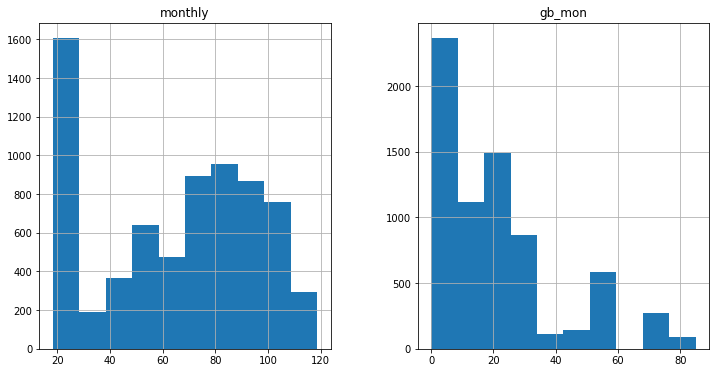

In [63]:
# plot histogram for numerical variables
data[numeric_variables].hist(figsize=(12, 6))

And then what we're going to do here with our months variable, is we're going to call cut, and what that's going to do is it's going to create bins. So we're going to replace months with bins, five different bins.

In [64]:
data['months'] = pd.cut(data['months'], bins=5)
data['months']

0       (0.929, 15.2]
1       (0.929, 15.2]
2        (15.2, 29.4]
3        (15.2, 29.4]
4        (29.4, 43.6]
            ...      
7038     (57.8, 72.0]
7039     (15.2, 29.4]
7040     (57.8, 72.0]
7041    (0.929, 15.2]
7042     (57.8, 72.0]
Name: months, Length: 7043, dtype: category
Categories (5, interval[float64]): [(0.929, 15.2] < (15.2, 29.4] < (29.4, 43.6] < (43.6, 57.8] < (57.8, 72.0]]

Now, that we've separated binary, categorical, ordinal, and numeric variables, we'll be encoding them as they needed to be.

### Encoding

We need to encode them because you can't pass in strings into our SKlearn models.

In [65]:
# import the class containing LabelBinarzer, and LabelEncoder
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
lb, le = LabelBinarizer(), LabelEncoder()

#### Encoding Ordinal Variables

In [66]:
for column in ordinal_variables:
    data[column] = le.fit_transform(data[column])
data[ordinal_variables].astype('category').describe()

,contract,satisfaction,months
count,7043,7043,7043
unique,3,5,5
top,0,2,0
freq,3610,2665,2470


#### Encode Binary Variables

In [67]:
for column in binary_variables:
    data[column] = lb.fit_transform(data[column])

There may still be **categorical** variables out of our full initial list that are not **ordinal** and not **binary**, they are nominal varibales, and we need to ensure that we one-hot encode those as well. And the best way to handle **nominal** categorical variables is to use One-Hot-Encoding. So we're going to use that pd.get _dummies that we've used before.

In [69]:
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))
data = pd.get_dummies(data, columns = categorical_variables, drop_first=True)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,1.734204,1.592924,0.00,0.0,1.00,3.00,4.00
multiple,7043.0,0.421837,0.493888,0.00,0.0,0.00,1.00,1.00
gb_mon,7043.0,20.515405,20.418940,0.00,3.0,17.00,27.00,85.00
security,7043.0,0.286668,0.452237,0.00,0.0,0.00,1.00,1.00
backup,7043.0,0.344881,0.475363,0.00,0.0,0.00,1.00,1.00
protection,7043.0,0.343888,0.475038,0.00,0.0,0.00,1.00,1.00
support,7043.0,0.290217,0.453895,0.00,0.0,0.00,1.00,1.00
unlimited,7043.0,0.673719,0.468885,0.00,0.0,1.00,1.00,1.00
contract,7043.0,0.754792,0.848468,0.00,0.0,0.00,2.00,2.00
paperless,7043.0,0.592219,0.491457,0.00,0.0,1.00,1.00,1.00


## Feature Scaling ⚖️

The K-nearest neighbors algorithm uses distance and hence requires scaled data.

**Given that it relies so heavily on distance, when we're trying to predict that point from our training set, this implies that the scale of our variables is going to be really important.**

Suppose we have another customer feature, a number of services to which they subscribe, and we can see an example of this here with the number of services is small, ranging between 1 and 5 as we see on the x-axis relative to the average data usage which is measured in gigabytes and ranges from 10 to 60.

![scale.png](images/scale.png)

Now let’s look at the example where data have been appropriately scaled.

![scale1.png](images/scale1.png)

Here, we'll be using `MinMaxScaler`

In [70]:
# import the class containing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# create an instance of the class
mm = MinMaxScaler()

We're just going to transform our ordinal and our numeric variables.

In [71]:
for column in [ordinal_variables + numeric_variables]:
    data[column] = mm.fit_transform(data[column])
round(data.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.434,0.398,0.0,0.000,0.250,0.750,1.0
multiple,7043.0,0.422,0.494,0.0,0.000,0.000,1.000,1.0
gb_mon,7043.0,0.241,0.240,0.0,0.035,0.200,0.318,1.0
security,7043.0,0.287,0.452,0.0,0.000,0.000,1.000,1.0
backup,7043.0,0.345,0.475,0.0,0.000,0.000,1.000,1.0
protection,7043.0,0.344,0.475,0.0,0.000,0.000,1.000,1.0
support,7043.0,0.290,0.454,0.0,0.000,0.000,1.000,1.0
unlimited,7043.0,0.674,0.469,0.0,0.000,1.000,1.000,1.0
contract,7043.0,0.377,0.424,0.0,0.000,0.000,1.000,1.0
paperless,7043.0,0.592,0.491,0.0,0.000,1.000,1.000,1.0


## Split into train and test samples ⚔️

In [73]:
# Set up X and y variables
y, X = data['churn_value'], data.drop(columns='churn_value')

In [74]:
# import the class containing train_test_split
from sklearn.model_selection import train_test_split
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Estimate a K-Nearest Neighbors Model 🤖
### Determine the right value of K

We'll examine results for values of K from 1 to 40. We'll focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy).
We're going to check different K values ranging from 1 to 40 to see what's the best value for K. 

In [76]:
# import the class containing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# import error metrics, F-Score, and Accuracy Score
from sklearn.metrics import accuracy_score, f1_score

In [77]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

### Generate charts that plot each of these measures as a function of K.

Now what we want to do is plot these out and see where do we have that elbow, for the f1 score, where is it the maximum for the error rate, where is it at its minimum.

#### Plot F1 Score

Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 1800x1200 with 0 Axes>

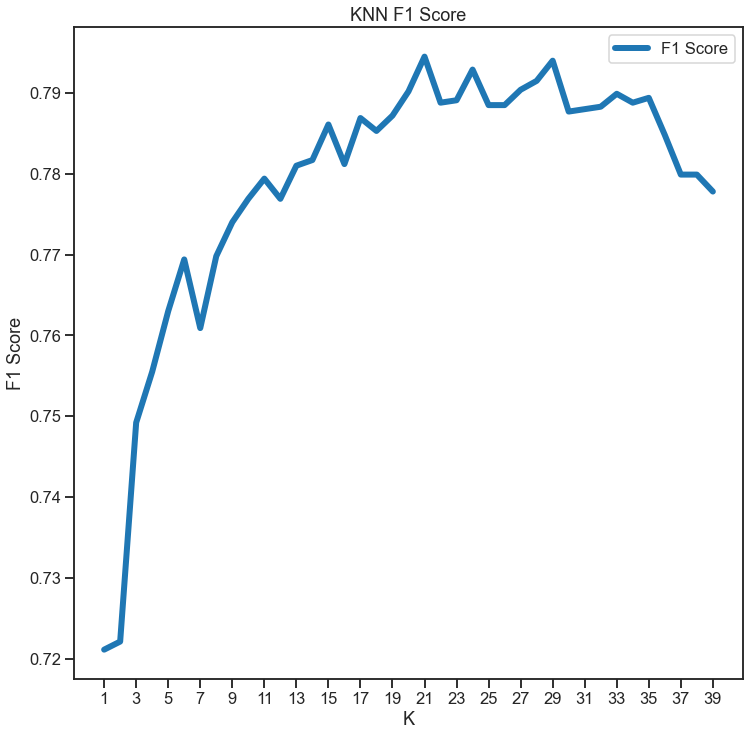

In [78]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')

We can see that as we increase K, we start to get better and better f1 scores and that somewhat plateaus around the 19-21 mark over here.

#### Plot Accuracy Score

Text(0.5, 1.0, 'KNN Elbow Curve')

<Figure size 1800x1200 with 0 Axes>

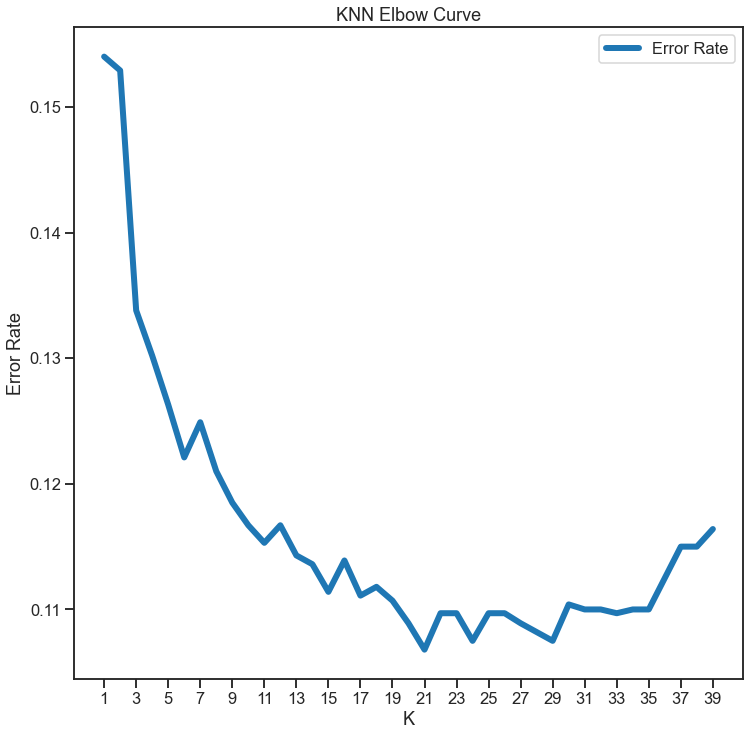

In [80]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')

And we can see again around the 21 mark is where we get those best results. And after that, we start to get a higher and higher error rate. And that's how we'd optimize and choose which K is best in regards to how well it's going to do on each one of the holdout sets.

### Estimate a K-Nearest Neighbor model using k=21

In [81]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=21)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

We're going to examine all of our different error matrices, as well as looking at our confusion matrix.
#### Examine the Precision, Recall, F-1 Score, and Accuracy of the classification

In order to see how well we performed, the error metrics that we're going to look at here are going to be all within this classification report.

In [82]:
from sklearn.metrics import classification_report
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2048
           1       0.82      0.73      0.77       770

    accuracy                           0.88      2818
   macro avg       0.86      0.83      0.85      2818
weighted avg       0.88      0.88      0.88      2818



We can also see the acuracy score and the F1 score separately as well.

In [84]:
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

Accuracy score:  0.88
F1 Score:  0.77


We were able to get that 0.9 precision. So if our precision is 90% that means out of all those that we predicted that would not churn, we got 90% of those correct. For recall, we got 94%. So for all those that were actually not churned, we predict 92% of them.

With the value equal to 1, and we see that those are lower. And then we see that that is a bit of an imbalanced data set where we have many fewer of the number of people that actually did not or did churn compared to did not churn which was 2048.\\


#### Illustrate the Confusion Matrix

Text(0.5, 40.5, 'Ground Truth')

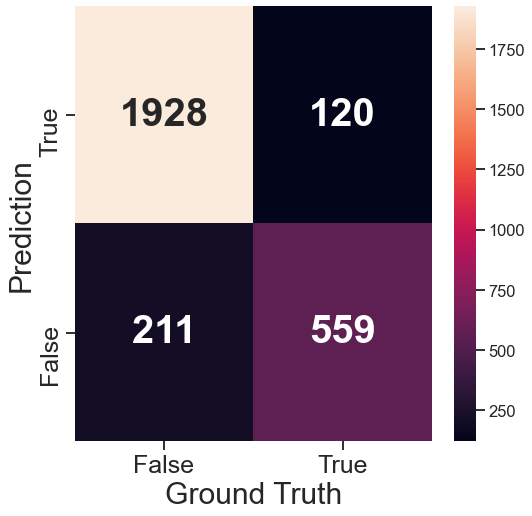

In [85]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

The rows are going to be our ground truth, whereas our columns are going to be our prediction. So we see that for not churn, we got `1928` of these predicted correctly, when the Ground Truth was not churn, then we see that `120` out of the Ground Truth that was not churned.